In [7]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

x = np.array([[2], [-2], [-1], [3], [7]])  # 输入值
y = np.array([-1, 13, 5, 2, 9])  # 真实值

In [8]:
import matplotlib.pyplot as plt

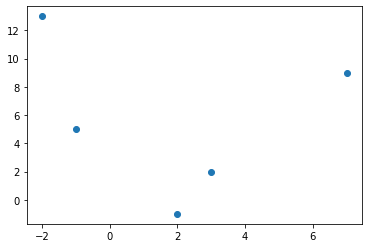

In [9]:
plt.scatter(x, y)

In [10]:
# 建议一个最大为 1 层的回归树弱学习器
weak_learner = DecisionTreeRegressor(max_depth=1)

x = np.array([[2], [-2], [-1], [3], [7]])  # 输入值
y = np.array([-1, 13, 5, 2, 9])  # 真实值

weak_learner.fit(x, y)  # F(x) 回归树

y_ = weak_learner.predict(x)  # 预测
y_

array([ 3.75, 13.  ,  3.75,  3.75,  3.75])

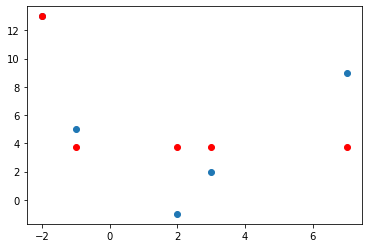

In [11]:
plt.scatter(x, y)
plt.scatter(x, y_, c="r")

In [12]:
# 计算 MSE 值
np.square(np.subtract(y, y_)).mean()

10.95

In [13]:
res = y - y_
res

array([-4.75,  0.  ,  1.25, -1.75,  5.25])

In [14]:
weak_learner.fit(x, res)  # h(x)

res_ = weak_learner.predict(x)
res_

array([-1.3125, -1.3125, -1.3125, -1.3125,  5.25  ])

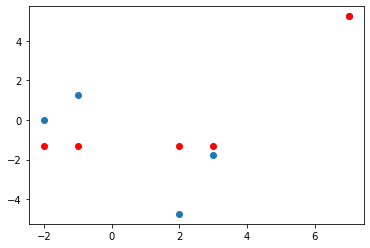

In [16]:
plt.scatter(x, res)
plt.scatter(x, res_, c="r")

In [17]:
res - res_

array([-3.4375,  1.3125,  2.5625, -0.4375,  0.    ])

In [18]:
# 计算 MSE 值
np.square(np.subtract(res, res_)).mean()

4.059375

In [28]:
from sklearn.datasets import load_digits

digits = load_digits()  # 加载手写字符识别数据集
X = digits.data  # 特征值
y = digits.target  # 目标值

X.shape, y.shape

((1797, 64), (1797,))

In [29]:
from sklearn.model_selection import train_test_split

# 划分数据集，70% 训练数据和 30% 测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [30]:
y_train[:3]

array([9, 7, 3])

In [22]:
import xgboost as xgb

model_c = xgb.XGBClassifier()
model_c

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [23]:
model_c.fit(X_train, y_train)  # 使用训练数据训练
model_c.score(X_test, y_test)  # 使用测试数据计算准确度

0.9537037037037037

In [24]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data  # 特征值
y = boston.target  # 目标值

# 划分数据集，80% 训练数据和 20% 测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [32]:
model_r = xgb.XGBRegressor()
model_r

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)

In [33]:
model_r.fit(X_train, y_train)  # 使用训练数据训练
model_r.score(X_test, y_test)  # 使用测试数据计算 R^2 评估指标

0.8587041845000727

In [34]:
model_c.get_params()

{'objective': 'multi:softprob',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [35]:
# 依次传入特征和目标值
train_d = xgb.DMatrix(data=X_train, label=y_train)
test_d = xgb.DMatrix(data=X_test, label=y_test)
train_d, test_d

(<xgboost.core.DMatrix at 0x20b5d43ce48>,
 <xgboost.core.DMatrix at 0x20b5d429d68>)

In [36]:
model_t = xgb.train(params={'objective': 'reg:squarederror'}, dtrain=train_d)
model_t

In [37]:
model_t.eval(test_d)  # 使用测试数据进行评估

'[0]\teval-rmse:1.212726'

In [38]:
import graphviz

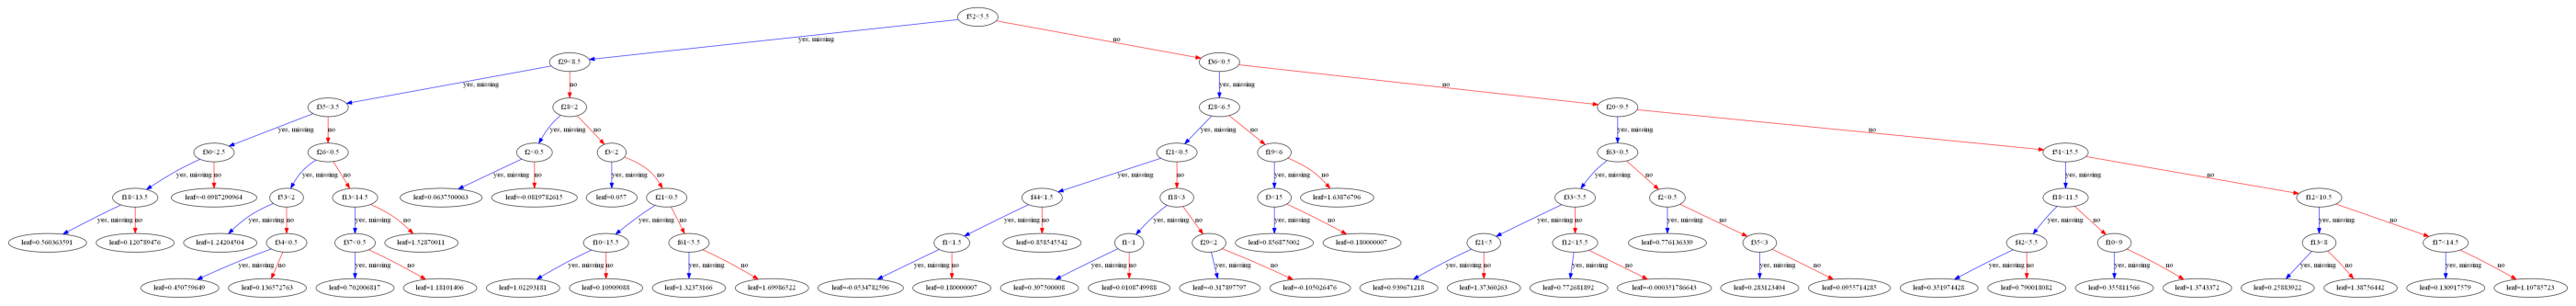

In [39]:
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

# 设置图像大小
rcParams['figure.figsize'] = [50, 10]

xgb.plot_tree(model_t, num_trees=1)

In [40]:
# 依次传入特征和目标值
boston_d = xgb.DMatrix(data=X, label=y)
xgb.cv(dtrain=boston_d, params={'objective': 'reg:squarederror'}, nfold=5, as_pandas=True)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,3.601057,0.022810,3.653864,0.116970
1,2.680946,0.011415,2.795119,0.093480
2,2.001993,0.016520,2.211475,0.072764
3,1.540840,0.013180,1.839356,0.061699
4,1.204999,0.007149,1.587881,0.061035
5,0.971651,0.013800,1.428181,0.052891
6,0.811719,0.013631,1.326108,0.051645
7,0.704692,0.017606,1.268483,0.047496
8,0.621430,0.018391,1.232486,0.051434
9,0.569693,0.022707,1.212296,0.052623
